# ABSTRACT


Este notebook busca investigar la relación entre la edad de los solicitantes de crédito y las características de los créditos otorgados, específicamente el valor y la duración del crédito. Utilizando un dataset detallado de una institución financiera, que incluye datos de 1000 solicitantes, se analiza cómo las variaciones en la edad afectan el monto y el plazo de los créditos concedidos. Para la revisión y análisis de datos vamos a estar utilizando las bibliotecas matplotlib y seaborn, para representar gráficamente estas relaciones y detectar patrones. La hipótesis principal es que a menor edad, el valor del crédito otorgado tiende a ser menor y la duración del crédito es más corta. Creemos que esto puede darse ya que a menor edad el historial de créditos y desde ya los ingresos de los solicitantes son menores teniendo una relación directamente proporcional al valor que se otorga, es decir: a menos edad, menos dinero en concepto de credito van a poder acceder.

Para poder comprobarlo vamos a usar scartterplot, boxplot e histogramas, vamos a buscar entender como se comportan las curvas de los histogramas. Adicionalmente el describe y hacer foco en los percentiles, nos va a ayudar a comprobar o refutar nuestra hipótesis.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

credits = fetch_openml(name="credit-g", as_frame=True)
df = credits.frame

print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

In [3]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

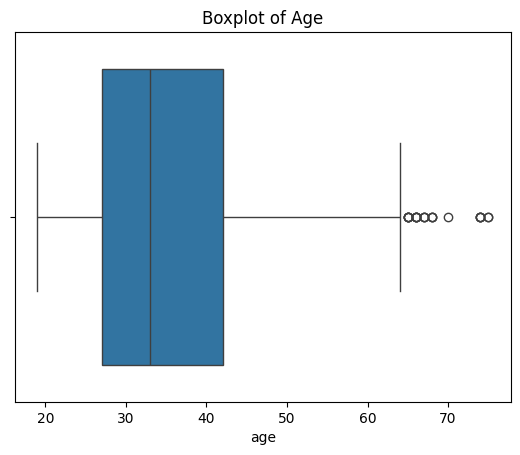

In [4]:
#Reviso outliers de edad

sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

In [5]:
# Contar valores nulos en cada columna
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Datos faltantes en cada columna")
print(missing_data)

Datos faltantes en cada columna
Series([], dtype: int64)


Todos los valores en el DataFrame están completos y no hay datos faltantes

In [6]:
# Ver estadísticas descriptivas para algunas variables numéricas
print(df[['credit_amount', 'duration', 'age']].describe())

       credit_amount     duration          age
count    1000.000000  1000.000000  1000.000000
mean     3271.258000    20.903000    35.546000
std      2822.736876    12.058814    11.375469
min       250.000000     4.000000    19.000000
25%      1365.500000    12.000000    27.000000
50%      2319.500000    18.000000    33.000000
75%      3972.250000    24.000000    42.000000
max     18424.000000    72.000000    75.000000


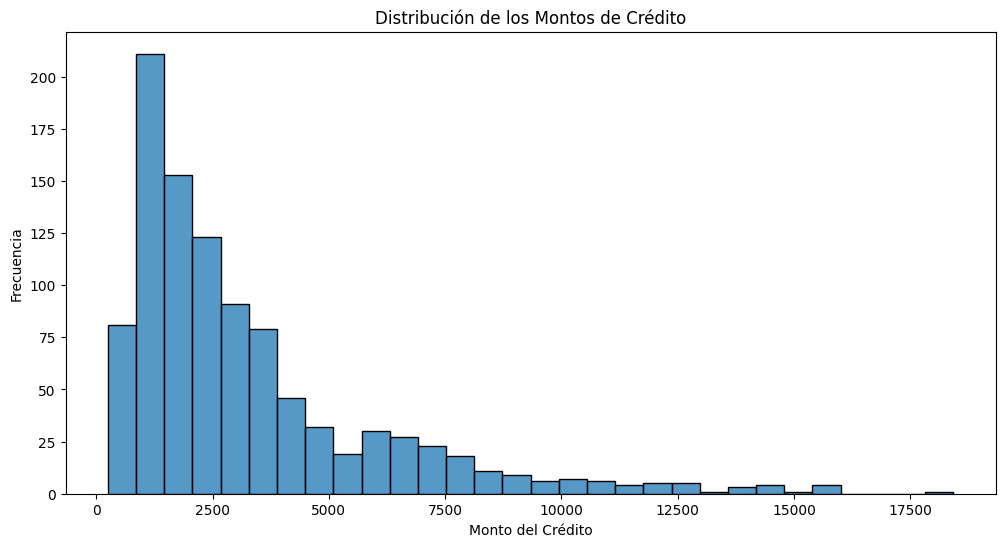

In [7]:
# Histograma para `credit_amount`
plt.figure(figsize=(12, 6))
sns.histplot(df['credit_amount'], bins=30, kde=False)
plt.xlabel('Monto del Crédito')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Montos de Crédito')
plt.show()

La curva del histograma de los creditos está positivamente sesgada, lo que implica que la mayor parte de los creditos el monto es relativamente bajo y hay muy pocos creditos en los que se otorgan valores altos.
Además con el describe vemos que el 75% de los créditos son menores o iguales a 3972.25.

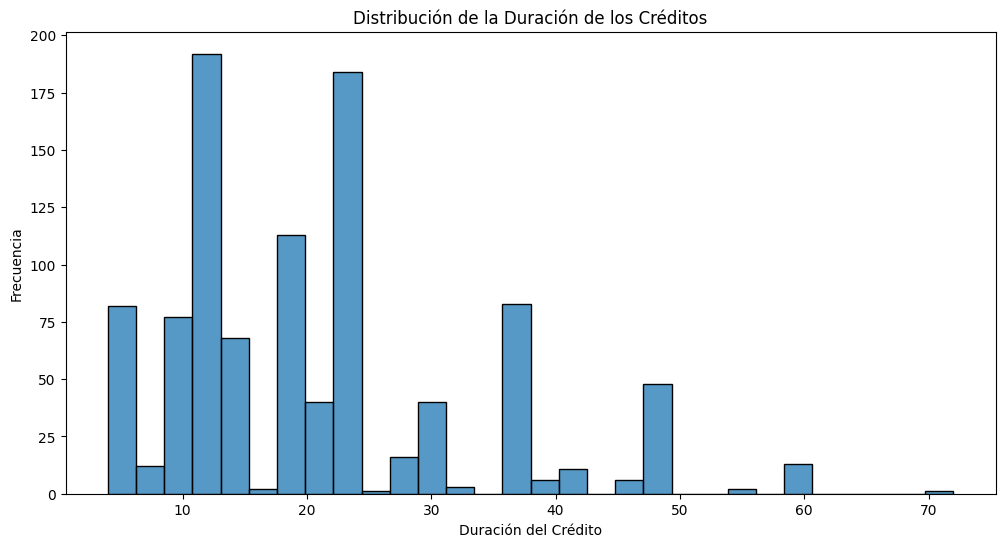

In [8]:
# Histograma para `duration`
plt.figure(figsize=(12, 6))
sns.histplot(df['duration'], bins=30, kde=False)
plt.xlabel('Duración del Crédito')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de los Créditos')
plt.show()

En el histograma de duración del crédito vemos que hay dos picos en el histograma hay dos valores que tienen frecuencias significativamente más altas en comparación con otros intervalos. Con el describe vemos que el 75% de los créditos tienen una duración menor o igual a 24.

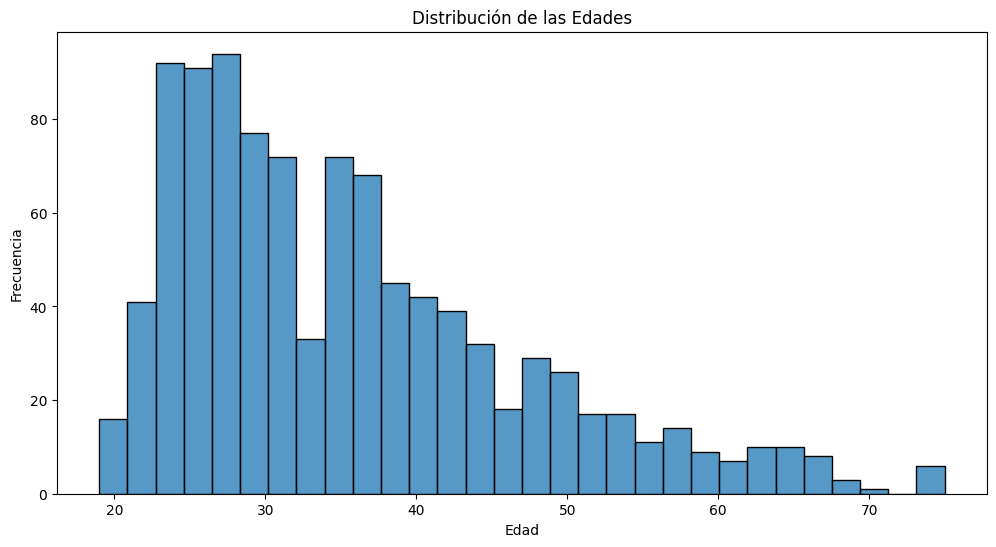

In [9]:
# Histograma para `age`
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=False)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Edades')
plt.show()

En este gráfico tenemos también una curva positivamente sesgada, coincide con lo que vimos en el boxplot y en el describe el 75% de las personas tienen 42 años o menos.

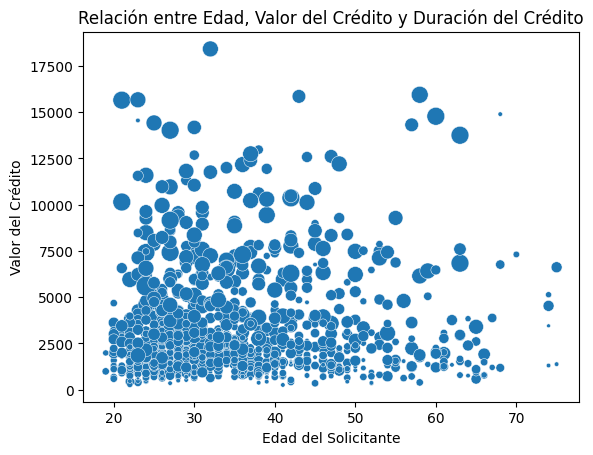

In [12]:
sns.scatterplot(x='age', y='credit_amount', size='duration', sizes=(5, 200), data=df, legend=False)

plt.xlabel('Edad del Solicitante')
plt.ylabel('Valor del Crédito')
plt.title('Relación entre Edad, Valor del Crédito y Duración del Crédito')
plt.show()